<a href="https://colab.research.google.com/github/muhammad1on1/Supermarket_project_analysis/blob/main/Supermarket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [526]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

17 ta ustun haqida ma'lumot:
**Branch** - Fillial (...**A**(Yangon),...**B**(Mandalay),...**C**(Naypyitaw)...),
**City** - Joylashgan shahar,
**Customer type** - Mijoz turui - *Member*(Maxsus klent - karta ochtirgan), *Normal* - Oddiy klent,
**Gender** - Jinsi - Female(), Male(), 
**Product line** - Sotib olingan mahsulot qaysi bo'limga tegishli:  Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
**Unit price** - Bir birlik mahsulot narxi
**Quantity** - Sotib olingan mahsulot soni
**Tax** - 5% li Soliq
**Total** - Soliqni qo'shgan holda  hisoblangan ummiy narx
**Date** - Sana
**Payment** - To'lov turi (*Cash*-naqd, *Credit*-kredit karta, *Ewallet*-elektron hamyon)
**Gross income** - yalpi daromad
**COGS** - Tannarxi
**Rating** - Reyting

In [527]:
data = pd.read_csv('sotuvlar.csv')
# data = data.sort_values(by="Date", key=pd.to_datetime)
# data["Date"] = pd.to_datetime(data.Date)
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [528]:
del data['Invoice ID']
del data['Time']
# del data['Date']
# del data['gross income']
del data['gross margin percentage']
data.reset_index()
data.head(10)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,30.2085,5.3
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,Ewallet,597.73,29.8865,4.1
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,Ewallet,413.04,20.6520,5.8
7,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,Ewallet,735.60,36.7800,8.0
8,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,Credit card,72.52,3.6260,7.2
9,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,Credit card,164.52,8.2260,5.9


In [529]:
data['Product line']

0           Health and beauty
1      Electronic accessories
2          Home and lifestyle
3           Health and beauty
4           Sports and travel
                ...          
995         Health and beauty
996        Home and lifestyle
997        Food and beverages
998        Home and lifestyle
999       Fashion accessories
Name: Product line, Length: 1000, dtype: object

# **supermarketda 3 oylik pul aylanish**

In [530]:
shop_pul_aylanish=data.groupby(['City']).sum()['Total']
shop_pul_aylanish

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

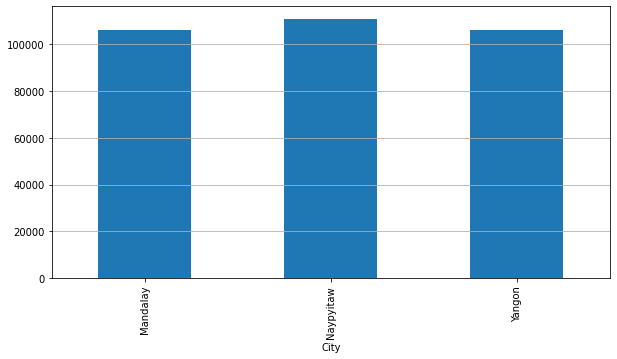

In [531]:
shop_pul_aylanish.plot(kind='bar',figsize=(10,5))
plt.grid(axis='y')

# **supermarketda 3 oylik daromat**

In [532]:
shop_daromat=data.groupby(['City']).sum()['gross income']
shop_daromat

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64

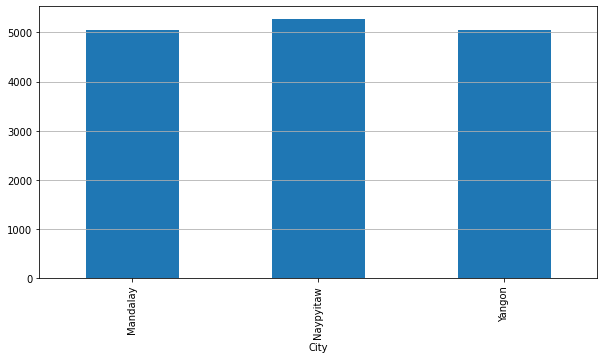

In [533]:
shop_daromat.plot(kind='bar',figsize=(10,5))
plt.grid(axis='y')

# **Shaharlar bo'yicha 3 oylik pul aylanishi**

In [534]:
shahar_pul_aylanish=data.groupby(['City']).sum()['Total']
shahar_pul_aylanish

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

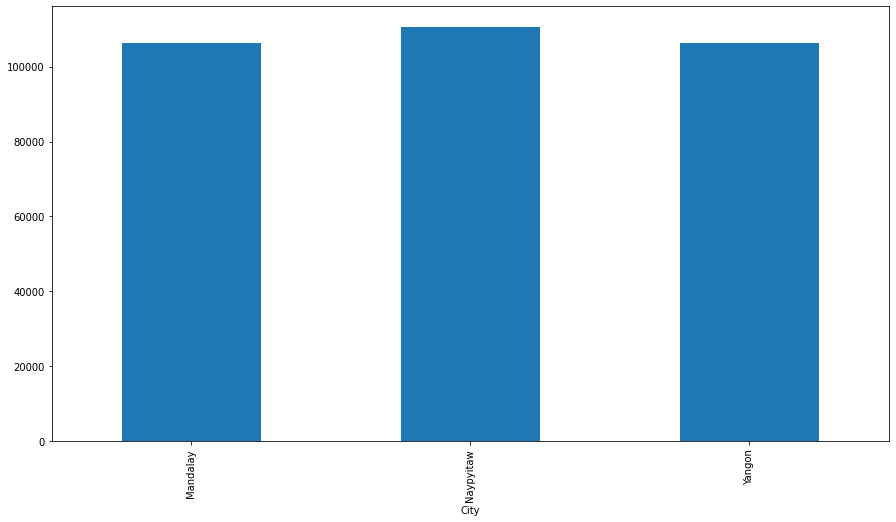

In [535]:
shahar_pul_aylanish.plot(kind='bar',figsize=(15,8))
# plt.legend(loc='lower right')

member(maxsus k).......normal(oddiy k).......female(erkak)........male(ayol).........


# **Shaharlar bo'yicha 3 oylik daromat**

In [536]:
shahar_daromat=data.groupby(['City']).sum()['gross income']
shahar_daromat

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64

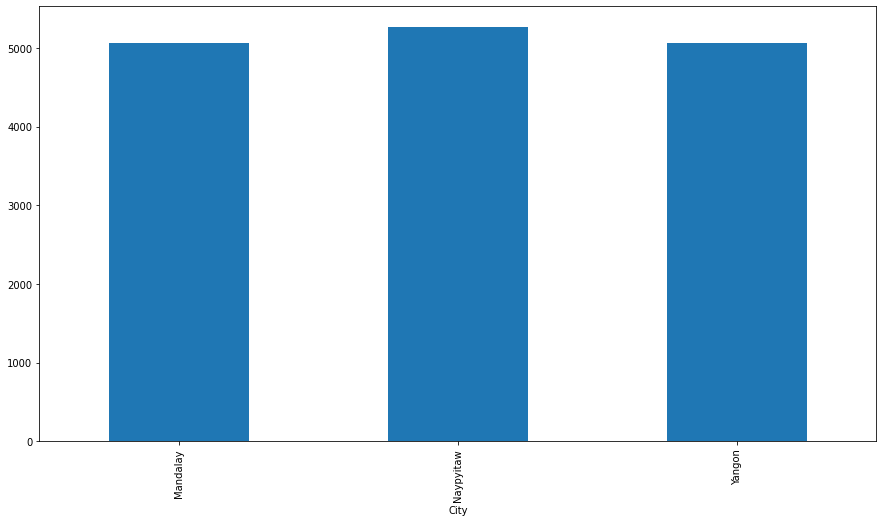

In [537]:
shahar_daromat.plot(kind='bar',figsize=(15,8))
# plt.legend(loc='lower right')

# **Daromat**

In [539]:
gen_cus=data.groupby(['City','Customer type','Gender']).sum()['gross income']
gen_cus

City       Customer type  Gender
Mandalay   Member         Female    1278.5920
                          Male      1278.7740
           Normal         Female    1241.8030
                          Male      1257.8630
Naypyitaw  Member         Female    1650.1640
                          Male      1058.4685
           Normal         Female    1287.2390
                          Male      1269.3050
Yangon     Member         Female    1268.7175
                          Male      1285.4480
           Normal         Female    1267.9095
                          Male      1235.0855
Name: gross income, dtype: float64

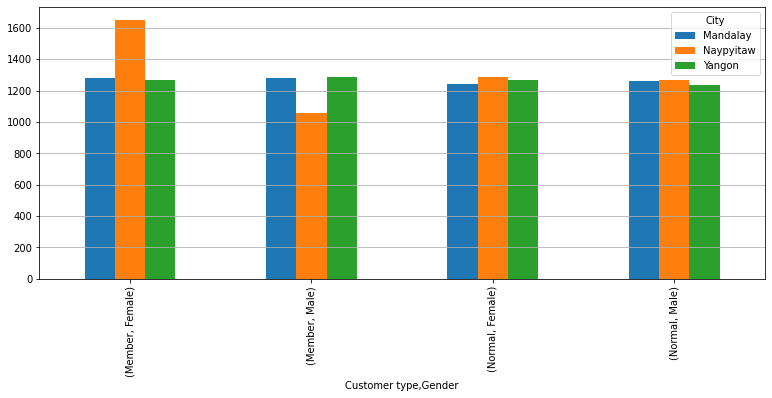

In [566]:
gen_cus.unstack(level=0).plot(kind='bar',figsize=(13,5))
plt.grid(axis='y')

# **Shaharlar bo'yicha odam soni**

In [563]:
shahar_turi_jinsi=data.groupby(['City','Customer type','Gender']).count()['Total']
shahar_turi_jinsi

City       Customer type  Gender
Mandalay   Member         Female    85
                          Male      80
           Normal         Female    77
                          Male      90
Naypyitaw  Member         Female    96
                          Male      73
           Normal         Female    82
                          Male      77
Yangon     Member         Female    80
                          Male      87
           Normal         Female    81
                          Male      92
Name: Total, dtype: int64

# **Mandalay = 332**(M = 165)..**Naypyitaw = 328**(M = 169)..**Yangon = 340**(M = 169).. **Member = 501..... Normal = 499..... Female=501..... Male = 499.....**

**Female**(erkak)..... **Male**(ayol).....

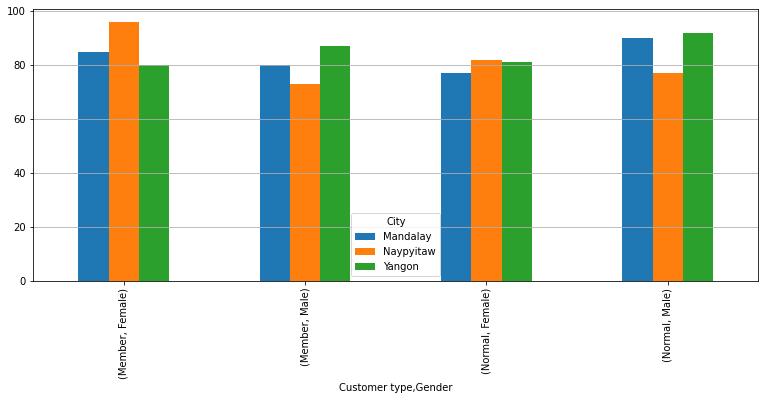

In [565]:
shahar_turi_jinsi.unstack(level=0).plot(kind='bar',figsize=(13,5))
plt.grid(axis='y')

In [541]:
mahsulot=data.groupby(['Product line']).count()['Total']
mahsulot

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Total, dtype: int64

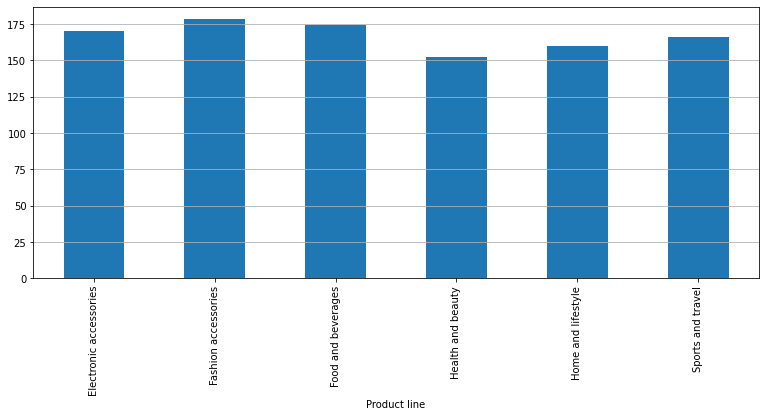

In [569]:
mahsulot.plot(kind='bar',figsize=(13,5))
plt.grid(axis='y')

In [567]:
city_product=data.groupby(['City','Product line']).count()['Total']
city_product

City       Product line          
Mandalay   Electronic accessories    55
           Fashion accessories       62
           Food and beverages        50
           Health and beauty         53
           Home and lifestyle        50
           Sports and travel         62
Naypyitaw  Electronic accessories    55
           Fashion accessories       65
           Food and beverages        66
           Health and beauty         52
           Home and lifestyle        45
           Sports and travel         45
Yangon     Electronic accessories    60
           Fashion accessories       51
           Food and beverages        58
           Health and beauty         47
           Home and lifestyle        65
           Sports and travel         59
Name: Total, dtype: int64

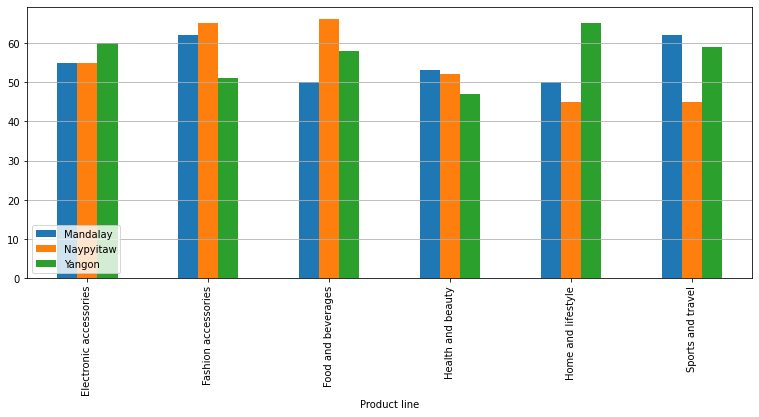

In [570]:
city_product.unstack(level=0).plot(kind='bar',figsize=(13,5))
plt.legend(loc='lower left')
plt.grid(axis='y')

In [545]:
sotilish=data.groupby(['Product line','Customer type','Gender']).count()['Total']
sotilish

Product line            Customer type  Gender
Electronic accessories  Member         Female    35
                                       Male      43
                        Normal         Female    49
                                       Male      43
Fashion accessories     Member         Female    47
                                       Male      39
                        Normal         Female    49
                                       Male      43
Food and beverages      Member         Female    51
                                       Male      43
                        Normal         Female    39
                                       Male      41
Health and beauty       Member         Female    30
                                       Male      43
                        Normal         Female    34
                                       Male      45
Home and lifestyle      Member         Female    47
                                       Male      36
                  

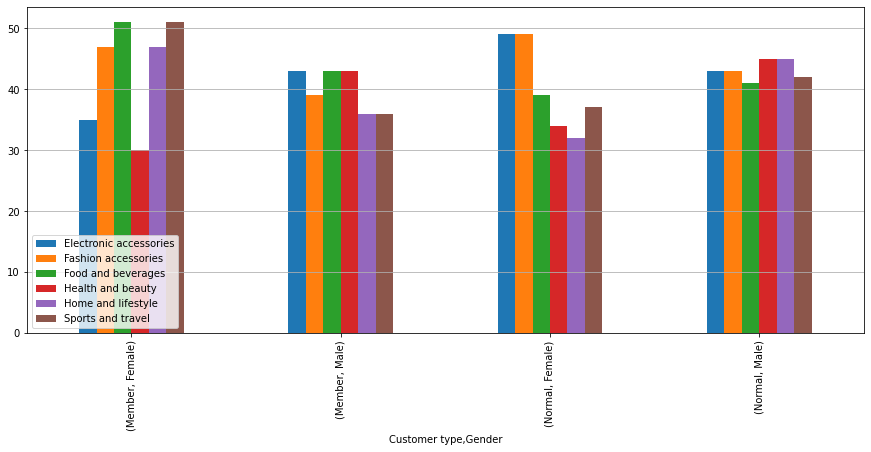

In [571]:
sotilish.unstack(level=0).plot(kind='bar',figsize=(15,6))
plt.legend(loc='lower left')
plt.grid(axis='y')

In [547]:
pd.to_datetime(data['Date'])

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: Date, Length: 1000, dtype: datetime64[ns]

In [549]:
data['Day']=pd.to_datetime(data['Date']).dt.day
data['Month']=pd.to_datetime(data['Date']).dt.month
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross income,Rating,Day,Month
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,26.1415,9.1,5,1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,3.8200,9.6,8,3
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,16.2155,7.4,3,3
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,23.2880,8.4,27,1
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,30.2085,5.3,8,2


In [550]:
day=data.groupby('Day').sum()['Total']
day

Day
1      9824.0835
2     12646.7565
3     12399.2295
4      7957.6245
5     12798.6915
6      9612.2250
7     11500.7130
8     13503.7770
9     13767.2850
10     9865.2015
11     9618.3675
12    11861.3040
13     5449.0485
14    13635.3420
15    15717.4605
16     9947.3220
17    10418.6145
18     5569.3365
19    14883.2355
20    11820.0705
21     5663.3535
22     7326.2280
23    12428.8185
24    11601.9750
25    11780.5695
26     8828.1900
27    13398.1680
28     9326.1315
29     7539.8085
30     7045.3215
31     5232.4965
Name: Total, dtype: float64

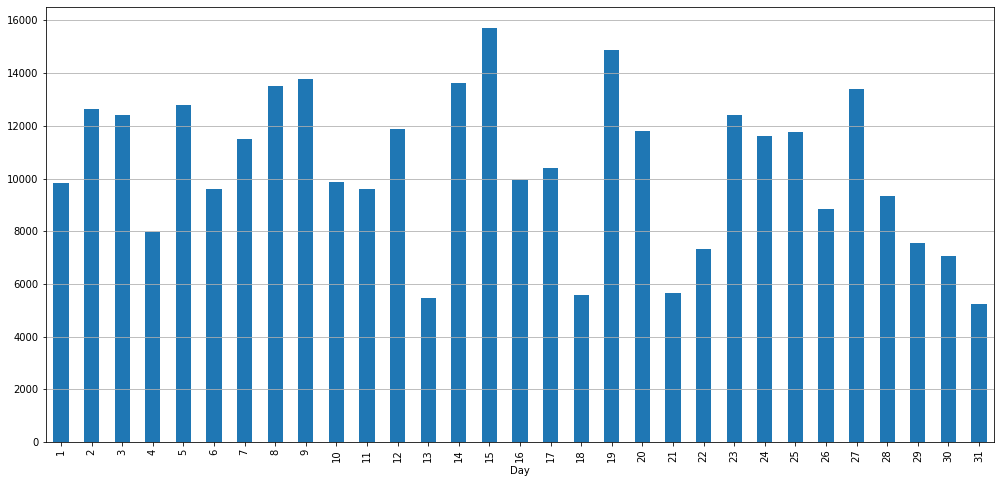

In [551]:
day.plot(kind='bar',figsize=(17,8))
plt.grid(axis='y')

In [552]:
month=data.groupby('Month').sum()['Total']
month

Month
1    116291.868
2     97219.374
3    109455.507
Name: Total, dtype: float64

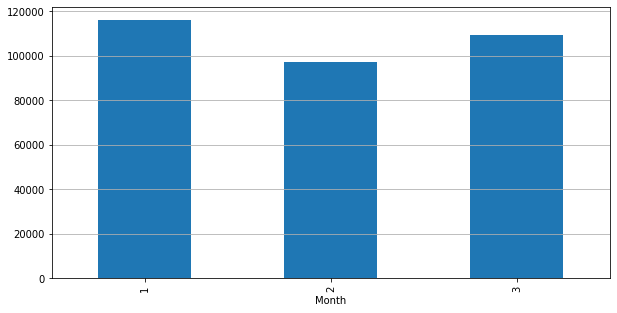

In [572]:
month.plot(kind='bar',figsize=(10,5))
plt.grid(axis='y')

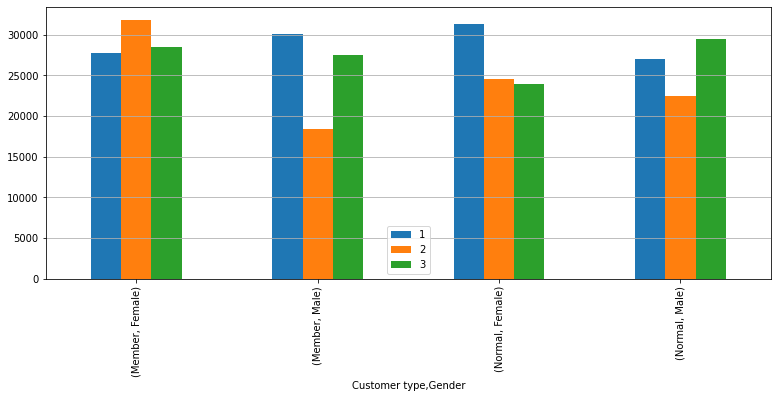

In [575]:
data.groupby(['Month','Customer type','Gender']).sum()['Total'].unstack(level=0).plot(kind='bar',figsize=(13,5))
plt.legend(loc='lower center')
plt.grid(axis='y')

In [581]:
pay_soni=data.groupby(['Payment']).count()['Total']
pay_soni

Payment
Cash           344
Credit card    311
Ewallet        345
Name: Total, dtype: int64

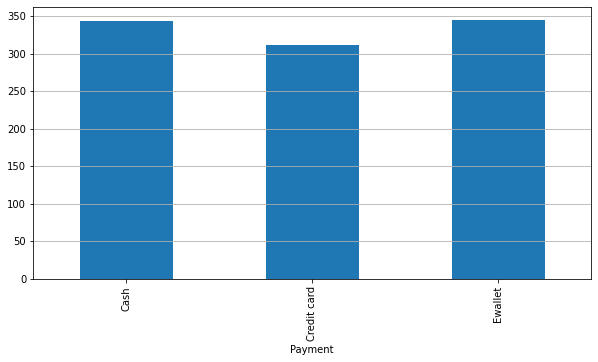

In [583]:
pay_soni.plot(kind='bar',figsize=(10,5))
plt.grid(axis='y')

In [584]:
pay=data.groupby(['Payment']).sum()['Total']
pay

Payment
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Total, dtype: float64

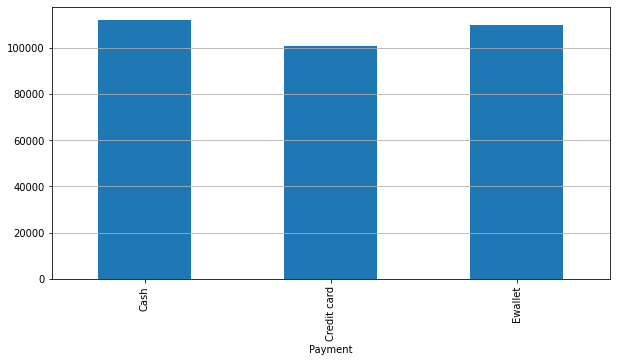

In [585]:
pay.plot(kind='bar',figsize=(10,5))
plt.grid(axis='y')